In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Missing data

In [2]:

# 예제 DataFrame 생성
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, np.nan, 35, 45],
    'Salary': [50000, 60000, np.nan, 80000]
})

print("Original DataFrame:")
print(df)


Original DataFrame:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob   NaN  60000.0
2  Charlie  35.0      NaN
3    David  45.0  80000.0


In [3]:

# 방법 1: 누락된 값 삭제하기 (누락된 데이터가 1/100 미만일 때 편리하게 사용 가능)
df_dropped = df.dropna()
print("\nDataFrame after dropping missing values:")
print(df_dropped)



DataFrame after dropping missing values:
    Name   Age   Salary
0  Alice  25.0  50000.0
3  David  45.0  80000.0


In [4]:

# 방법 2: 누락된 값 대체하기 (모든 NaN을 0으로 대체) -> 좋지 않은 방법일 수 있음.
df_filled_zero = df.fillna(0)
print("\nDataFrame after replacing missing values with 0:")
print(df_filled_zero)



DataFrame after replacing missing values with 0:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob   0.0  60000.0
2  Charlie  35.0      0.0
3    David  45.0  80000.0


In [5]:

# 방법 3: 누락된 값 대체하기 (특정 열만 대체) -> 평균으로 대체 (일반적으로 좋은 방법)
df['Age'].fillna(df['Age'].mean(), inplace=True)
print("\nDataFrame after replacing missing values in 'Age' column with its mean:")
print(df)


DataFrame after replacing missing values in 'Age' column with its mean:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  35.0  60000.0
2  Charlie  35.0      NaN
3    David  45.0  80000.0


# Chi-square Calculation

In [6]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성 (Nominal 변수)
data = {
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'Preference': ['Apple', 'Banana', 'Apple', 'Apple', 'Banana', 'Banana', 'Apple', 'Banana']
}
df = pd.DataFrame(data)

# 교차표 생성
contingency_table = pd.crosstab(df['Gender'], df['Preference'])
print("Contingency Table:")
print(contingency_table)

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi2 value: {chi2}")
print(f"p-value: {p}")

# p-value 평가
alpha = 0.05
if p < alpha:
    print("Variables are associated (p < 0.05)")
else:
    print("Variables are independent (p >= 0.05)")

Contingency Table:
Preference  Apple  Banana
Gender                   
Female          3       1
Male            1       3
Chi2 value: 0.5
p-value: 0.47950012218695337
Variables are independent (p >= 0.05)


# Data Transformation

In [7]:
import pandas as pd
import numpy as np

# 임의의 데이터 생성
data = {'Value': [1, 2, 3, 4, 5, 100, 200]}
df = pd.DataFrame(data)

In [14]:
# 자연로그 스케일링 (컴퓨터 공학 등의 일반적인 경우)
df['Log_Scaled'] = np.log(df['Value'])
print("Log-scaled data:")
print(df)
# 로그10 스케일링은 금융 데이터의 경우 자주 사용

Log-scaled data:
   Value  Log_Scaled  Normalized
0      1    0.000000    0.000000
1      2    0.693147    0.005025
2      3    1.098612    0.010050
3      4    1.386294    0.015075
4      5    1.609438    0.020101
5    100    4.605170    0.497487
6    200    5.298317    1.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Normalized'] = scaler.fit_transform(df[['Value']])
print("\nNormalized data:")
print(df)


Normalized data:
   Value  Log_Scaled  Normalized
0      1    0.000000    0.000000
1      2    0.693147    0.005025
2      3    1.098612    0.010050
3      4    1.386294    0.015075
4      5    1.609438    0.020101
5    100    4.605170    0.497487
6    200    5.298317    1.000000


In [16]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['Discretized'] = discretizer.fit_transform(df[['Value']])
print("\nDiscretized data:")
print(df)


Discretized data:
   Value  Log_Scaled  Normalized  Discretized
0      1    0.000000    0.000000          0.0
1      2    0.693147    0.005025          0.0
2      3    1.098612    0.010050          0.0
3      4    1.386294    0.015075          0.0
4      5    1.609438    0.020101          0.0
5    100    4.605170    0.497487          1.0
6    200    5.298317    1.000000          2.0


# Visualization

In [17]:
# Iris 데이터셋 로딩
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [21]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


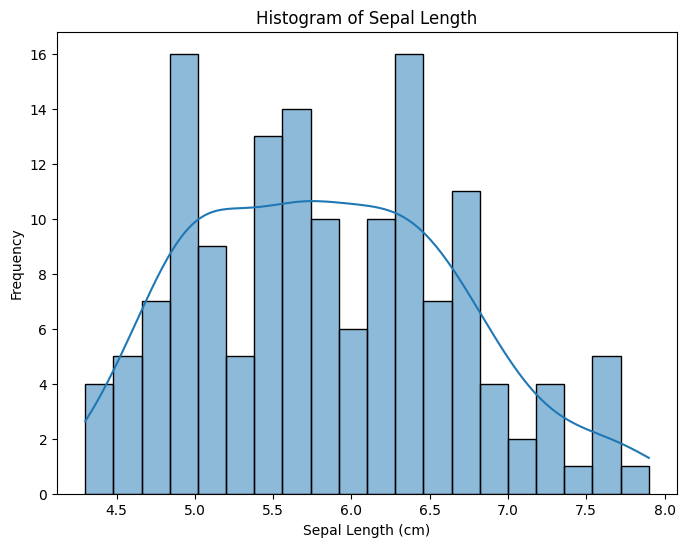

In [22]:
# Sepal Length에 대한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(df_iris['sepal length (cm)'], bins=20, kde=True) # kde: 커널 밀도 추정 (분포를 부드럽게 표현)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

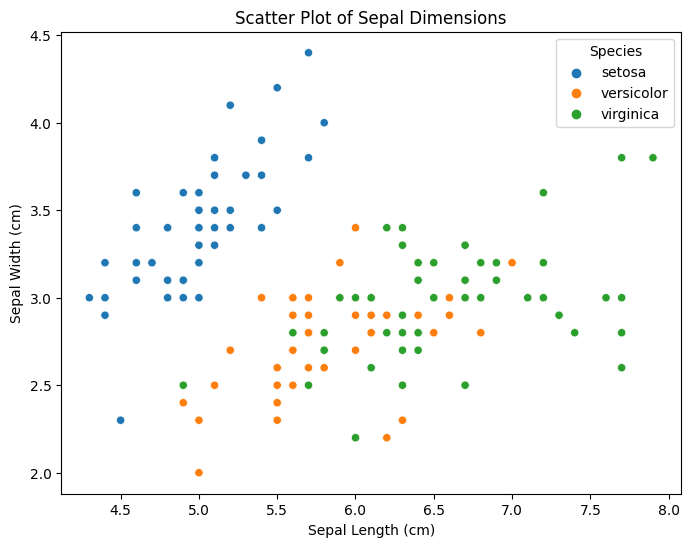

In [23]:
# Sepal Length와 Sepal Width에 대한 Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df_iris)
plt.title('Scatter Plot of Sepal Dimensions')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

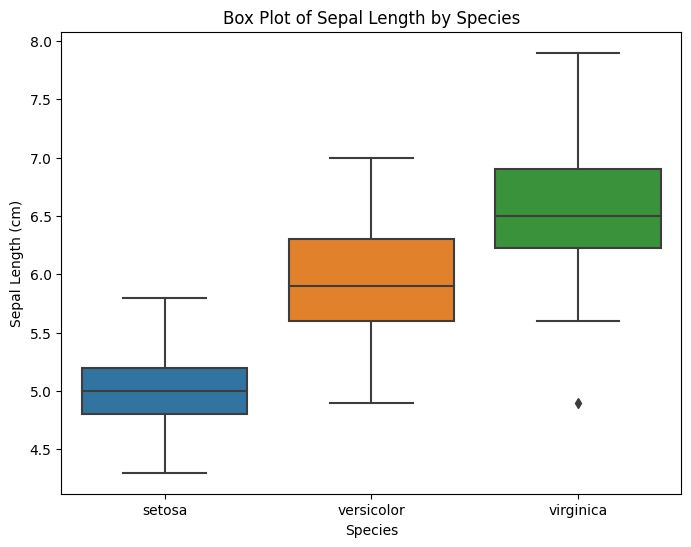

In [20]:
# Sepal Length에 대한 Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df_iris)
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()